In [1]:
import numpy as np
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
max_words = 1000
batch_size = 32
epochs = 5

### 载入数据集

In [3]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words, test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

8982 train sequences
2246 test sequences


In [4]:
num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

46 classes


In [5]:
# Vectorizing sequence data
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (8982, 1000)
x_test shape: (2246, 1000)


In [6]:
# Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (8982, 46)
y_test shape: (2246, 46)


### 建模

In [7]:
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               512512    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 46)                23598     
_________________________________________________________________
activation_2 (Activation)    (None, 46)                0         
Total params: 536,110
Trainable params: 536,110
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### 训练模型

In [10]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 3s 391us/step - loss: 1.4319 - acc: 0.6757 - val_loss: 1.0895 - val_acc: 0.7642
Epoch 2/5
8083/8083 [==============================] - 3s 372us/step - loss: 0.7873 - acc: 0.8173 - val_loss: 0.9407 - val_acc: 0.7864
Epoch 3/5
8083/8083 [==============================] - 3s 404us/step - loss: 0.5467 - acc: 0.8654 - val_loss: 0.8949 - val_acc: 0.7976
Epoch 4/5
8083/8083 [==============================] - 3s 402us/step - loss: 0.4133 - acc: 0.8990 - val_loss: 0.8763 - val_acc: 0.8098
Epoch 5/5
8083/8083 [==============================] - 3s 365us/step - loss: 0.3248 - acc: 0.9169 - val_loss: 0.9121 - val_acc: 0.7998


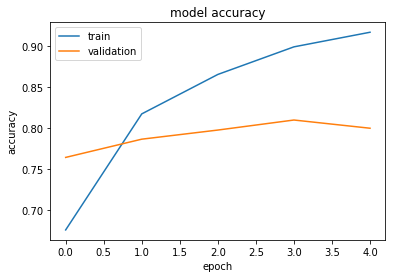

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

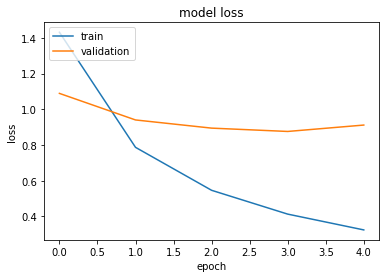

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 评估模型

In [13]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 54us/step
Test score: 0.8939900612682502
Test accuracy: 0.792520035618878
